<a href="https://colab.research.google.com/github/tpcorreia/Master_AI_2023_UAX/blob/EDA-Training/EDA_Tema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
## Datos missing
Tratamiento con `scikilearn` y `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Download the data
And install some libraries necesary for analysis

In [2]:
# download the data to your colab copy
!wget https://github.com/jmpicaza/UAX_AI_master_2023/raw/main/data/imr_india_kaggle.db -O sample_data/imr_india_kaggle.db


--2024-01-08 21:41:45--  https://github.com/jmpicaza/UAX_AI_master_2023/raw/main/data/imr_india_kaggle.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jmpicaza/UAX_AI_master_2023/main/data/imr_india_kaggle.db [following]
--2024-01-08 21:41:45--  https://raw.githubusercontent.com/jmpicaza/UAX_AI_master_2023/main/data/imr_india_kaggle.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45056 (44K) [application/octet-stream]
Saving to: ‘sample_data/imr_india_kaggle.db’

sample_data/imr_ind 100%[===================>]  44.00K  --.-KB/s    in 0.001s  

2024-01-08 21:41:46 (29.0 MB/s) - ‘sample_data/

In [3]:
!pip install jupysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 807.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 10.9 MB/s eta 0:00:00


In [ ]:
# make a connection to sqlite db and use sql magic to focus in SQL
conn = sqlite3.connect('sample_data/imr_india_kaggle.db')
%load_ext sql
%sql conn
%config SqlMagic.autopandas = True
# pandas configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# data_table.enable_dataframe_formatter()
# data_table.disable_dataframe_formatter()

Deploy AI and data apps for free on Ploomber Cloud! Learn more: https://docs.cloud.ploomber.io/en/latest/quickstart/signup.html


## Explore the tables and see the data
1. With SQL
2. With DataFrames

In [ ]:
%%sql
select distinct name
from sqlite_master
where type = 'table'
order by name desc, tbl_name asc

Running query in 'Connection'

,name
0,trends_residence_IMR
1,trends_residence_2006-2012_IMR
2,state_IMR
3,gender_based_IMR
4,Infant_Mortality_Rate_1


In [ ]:
%%sql
select * from 'trends_residence_2006-2012_IMR'
limit 5

Running query in 'Connection'

,India/States/Uts,Total-2006,Total-2007,Total-2008,Total-2009,Total-2010,Total-2011,Total-2012,Rural-2006,Rural-2007,Rural-2008,Rural-2009,Rural-2010,Rural-2011,Rural-2012,Urban-2006,Urban-2007,Urban-2008,Urban-2009,Urban-2010,Urban-2011,Urban-2012
0,INDIA,57.0,55.0,53.0,50.0,47.0,44.0,42.0,62.0,61.0,58.0,55.0,51.0,48.0,46.0,39.0,37.0,36.0,34.0,31.0,29.0,28.0
1,Andhra Pradesh,56.0,54.0,52.0,49.0,46.0,43.0,41.0,62.0,60.0,58.0,54.0,51.0,47.0,46.0,38.0,37.0,36.0,35.0,33.0,31.0,30.0
2,Assam,67.0,66.0,64.0,61.0,58.0,55.0,55.0,70.0,68.0,66.0,64.0,60.0,58.0,58.0,42.0,41.0,39.0,37.0,36.0,34.0,33.0
3,Bihar,60.0,58.0,56.0,52.0,48.0,44.0,43.0,62.0,59.0,57.0,53.0,49.0,45.0,44.0,45.0,44.0,42.0,40.0,38.0,34.0,34.0
4,Chhatisgarh,61.0,59.0,57.0,54.0,51.0,48.0,47.0,62.0,61.0,59.0,55.0,52.0,49.0,48.0,50.0,49.0,48.0,47.0,44.0,41.0,39.0


In [ ]:
# leo la query con pandas
trends_residence_IMR = pd.read_sql_query("select * from trends_residence_IMR", conn)
trends_residence_IMR

,India and Bigger States,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,India,68.0,58.0,42.0,-3.131223,-4.506355,74.0,64.0,46.0,-2.861890,-4.608183,44.0,40.0,28.0,-1.888150,-4.967720,None,None,None,None,None
1,Andhra Pradesh,65.0,57.0,41.0,-2.592522,-4.597791,74.0,63.0,46.0,-3.167361,-4.393332,36.0,39.0,30.0,1.613736,-3.678691,None,None,None,None,None
2,Assam,75.0,68.0,55.0,-1.940533,-2.985588,78.0,71.0,58.0,-1.863006,-2.847763,35.0,39.0,33.0,2.187862,-2.358236,None,None,None,None,None
3,Bihar,62.0,61.0,43.0,-0.324682,-4.872624,63.0,62.0,44.0,-0.319495,-4.781136,53.0,47.0,34.0,-2.374247,-4.520183,None,None,None,None,None
4,Chhatisgarh,NaN,63.0,47.0,NaN,-4.099146,0.0,65.0,48.0,NaN,-4.238774,0.0,52.0,39.0,NaN,-4.026439,None,None,None,None,None
5,Delhi,NaN,35.0,25.0,NaN,-4.693051,0.0,44.0,36.0,NaN,-2.826024,0.0,33.0,23.0,NaN,-5.026600,None,None,None,None,None
6,Gujarat,62.0,54.0,38.0,-2.725185,-4.896052,69.0,63.0,45.0,-1.802984,-4.693051,45.0,37.0,24.0,-3.839250,-5.996458,None,None,None,None,None
7,Haryana,67.0,60.0,42.0,-2.182786,-4.967720,69.0,64.0,46.0,-1.493208,-4.608183,57.0,45.0,33.0,-4.617757,-4.334059,None,None,None,None,None
8,Himachal Pradesh,51.0,49.0,36.0,-0.796914,-4.308724,52.0,50.0,37.0,-0.781346,-4.210299,35.0,20.0,25.0,-10.588704,3.239118,None,None,None,None,None
9,Jammu and Kashmir,NaN,50.0,39.0,NaN,-3.487194,0.0,53.0,41.0,NaN,-3.600991,0.0,39.0,28.0,NaN,-4.623382,None,None,None,None,None


In [ ]:
# Summary statistics
trends_residence_IMR.describe()

,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012
count,17.000000,21.000000,21.000000,17.000000,21.000000,21.00000,21.000000,21.000000,17.000000,21.000000,21.000000,21.000000,21.000000,17.000000,21.000000
mean,62.764706,53.142857,38.428571,-2.933134,-4.537712,54.47619,57.142857,41.761905,-2.864471,-4.343717,34.857143,38.571429,28.047619,-2.089296,-4.381800
std,18.810002,15.582958,11.847242,1.778599,1.250476,32.24689,15.975875,11.886567,2.182460,1.165372,21.480889,10.934219,7.761934,4.303174,2.255187
min,14.000000,14.000000,12.000000,-6.216527,-7.772666,0.00000,15.000000,13.000000,-6.980218,-6.768915,0.000000,12.000000,9.000000,-10.588704,-8.685038
25%,51.000000,44.000000,32.000000,-3.285884,-4.896052,52.00000,49.000000,36.000000,-4.505806,-4.693051,24.000000,33.000000,24.000000,-3.839250,-5.257684
50%,62.000000,54.000000,39.000000,-2.667278,-4.573368,63.00000,62.000000,44.000000,-2.635282,-4.393332,37.000000,39.000000,28.000000,-3.035973,-4.566899
75%,75.000000,63.000000,47.000000,-2.182786,-4.099146,74.00000,65.000000,48.000000,-1.768793,-4.026439,53.000000,45.000000,33.000000,-0.531945,-4.026439
max,95.000000,76.000000,56.000000,0.000000,-2.178082,99.00000,80.000000,60.000000,1.389421,-2.023544,66.000000,55.000000,39.000000,10.197229,3.239118


In [ ]:
# Check for missing values
print(trends_residence_IMR.isnull().sum())

India and Bigger States                      2
Total-2000                                   6
Total-2005                                   2
Total-2012                                   2
Total-% compound annual change-2000/2005     6
Total-% compound annual change-2005/2012     2
Rural-2000                                   2
Rural-2005                                   2
Rural-2012                                   2
Rural-% compound annual change-2000/2005     6
Rural-% compound annual change-2005/2012     2
Urban-2000                                   2
Urban-2005                                   2
Urban-2012                                   2
Urban-% compound annual change-2000/2005     6
Urban-% compound annual change-2005/2012     2
Unnamed: 16                                 23
Unnamed: 17                                 23
Unnamed: 18                                 23
Unnamed: 19                                 23
Unnamed: 20                                 23
dtype: int64


### ¿Qué está pasando?

Hay 5 columnas de más y dos filas de más. Esto es una situación típica cuando se importan csv y hojas excel.

Vamos a limpiarlo!


In [ ]:
fixed = trends_residence_IMR.iloc[0:21,0:16]
# load clean data in db
fixed.to_sql('trends_residence_IMR', conn, if_exists='replace', index=False)
# reload the db
trends_residence_IMR = pd.read_sql_query("select * from trends_residence_IMR", conn)
trends_residence_IMR

,India and Bigger States,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012
0,India,68.0,58.0,42.0,-3.131223,-4.506355,74.0,64.0,46.0,-2.861890,-4.608183,44.0,40.0,28.0,-1.888150,-4.967720
1,Andhra Pradesh,65.0,57.0,41.0,-2.592522,-4.597791,74.0,63.0,46.0,-3.167361,-4.393332,36.0,39.0,30.0,1.613736,-3.678691
2,Assam,75.0,68.0,55.0,-1.940533,-2.985588,78.0,71.0,58.0,-1.863006,-2.847763,35.0,39.0,33.0,2.187862,-2.358236
3,Bihar,62.0,61.0,43.0,-0.324682,-4.872624,63.0,62.0,44.0,-0.319495,-4.781136,53.0,47.0,34.0,-2.374247,-4.520183
4,Chhatisgarh,NaN,63.0,47.0,NaN,-4.099146,0.0,65.0,48.0,NaN,-4.238774,0.0,52.0,39.0,NaN,-4.026439
5,Delhi,NaN,35.0,25.0,NaN,-4.693051,0.0,44.0,36.0,NaN,-2.826024,0.0,33.0,23.0,NaN,-5.026600
6,Gujarat,62.0,54.0,38.0,-2.725185,-4.896052,69.0,63.0,45.0,-1.802984,-4.693051,45.0,37.0,24.0,-3.839250,-5.996458
7,Haryana,67.0,60.0,42.0,-2.182786,-4.967720,69.0,64.0,46.0,-1.493208,-4.608183,57.0,45.0,33.0,-4.617757,-4.334059
8,Himachal Pradesh,51.0,49.0,36.0,-0.796914,-4.308724,52.0,50.0,37.0,-0.781346,-4.210299,35.0,20.0,25.0,-10.588704,3.239118
9,Jammu and Kashmir,NaN,50.0,39.0,NaN,-3.487194,0.0,53.0,41.0,NaN,-3.600991,0.0,39.0,28.0,NaN,-4.623382


In [ ]:
# Check for missing values
print(trends_residence_IMR.isnull().sum())

India and Bigger States                     0
Total-2000                                  4
Total-2005                                  0
Total-2012                                  0
Total-% compound annual change-2000/2005    4
Total-% compound annual change-2005/2012    0
Rural-2000                                  0
Rural-2005                                  0
Rural-2012                                  0
Rural-% compound annual change-2000/2005    4
Rural-% compound annual change-2005/2012    0
Urban-2000                                  0
Urban-2005                                  0
Urban-2012                                  0
Urban-% compound annual change-2000/2005    4
Urban-% compound annual change-2005/2012    0
dtype: int64


In [ ]:
df_t2000 = trends_residence_IMR.iloc[:,1:4].copy()
df_t2000.index = trends_residence_IMR['India and Bigger States']

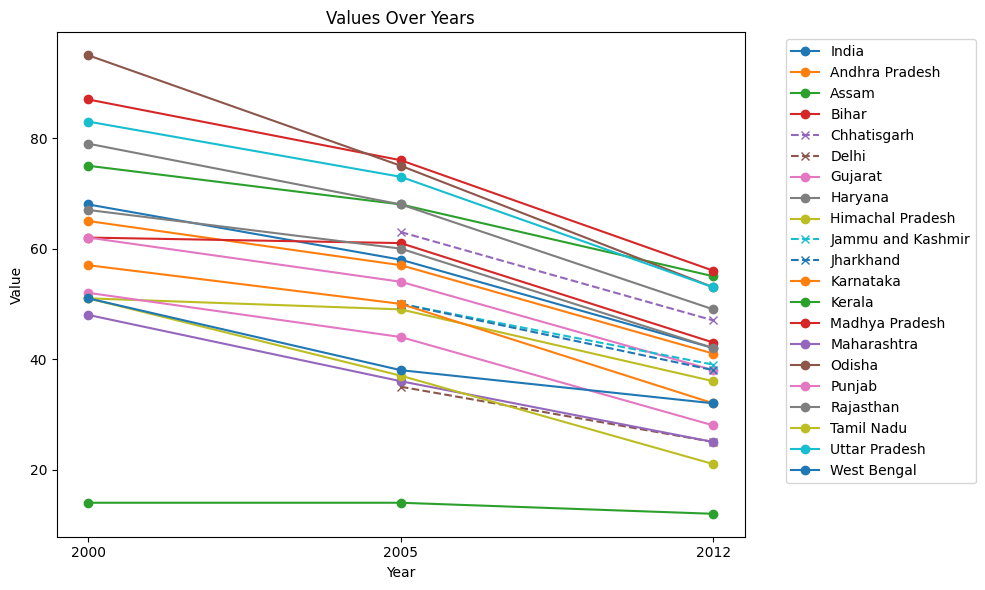

In [ ]:
def plot_with_imputation(df_original, df_imputed):
    plt.figure(figsize=(10, 6))
    df_original.index = trends_residence_IMR['India and Bigger States']
    for label, row_original in df_original.iterrows():
        row_imputed = df_imputed.loc[label]

        # Check if the original row had missing data
        if row_original.isnull().any():
            # Plot imputed data with a dotted line and different marker
            plt.plot(['2000', '2005', '2012'], row_imputed, marker='x', linestyle='--', label=f'{label}')
        else:
            # Plot original data with a solid line
            plt.plot(['2000', '2005', '2012'], row_original, marker='o', linestyle='-', label=f'{label}')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Values Over Years')

    # Place the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    return plt.show()


plot_with_imputation(df_t2000,df_t2000)

In [ ]:
# Example: Filling missing values with the mean
df_media = df_t2000.copy()
df_media.fillna(df_media.mean(), inplace=True)

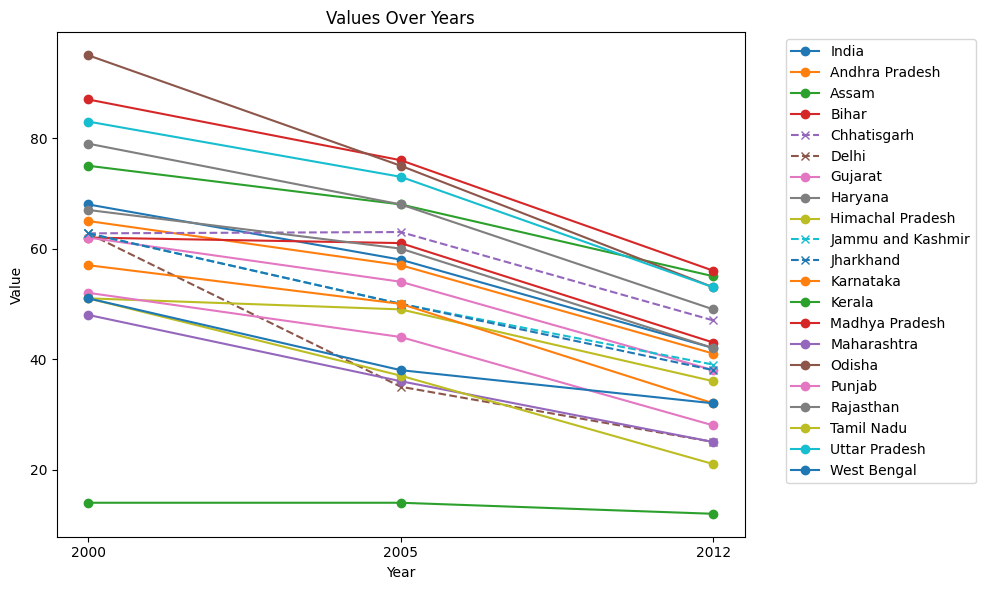

In [ ]:
# En este caso no es la mejor técnica. No tiene mucho sentido aplicar una media de
# la columna porque las distintas regiones tienen distinta población
plot_with_imputation(df_t2000,df_media)

Una técnica más adecuada sería estudiar la forma de las curvas de las ciudades que tienen 3 puntos y sacar con ello el punto que falta.

Vamos a ello.

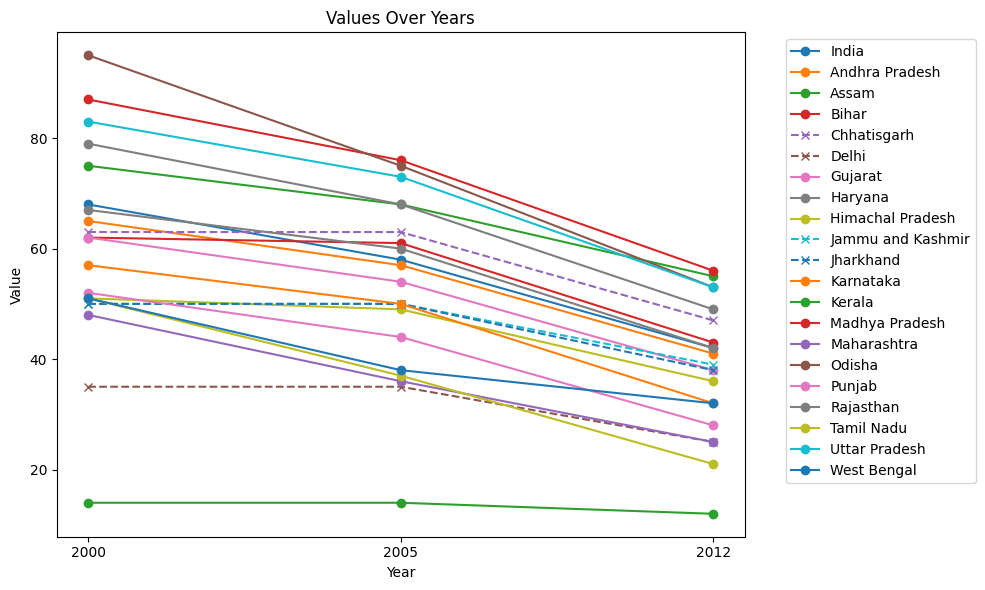

In [ ]:
# vamos a arreglar los missing de la columna Total-2000
# probemos con una interpolación lineal
df_linear = df_t2000.interpolate(method='linear', axis=1, limit_direction='both')

plot_with_imputation(df_t2000,df_linear)
# pandas con tan pocos datos no hace la interpolación correctamente ya que devuelve
# para 2000 el mismo valor que para 2005

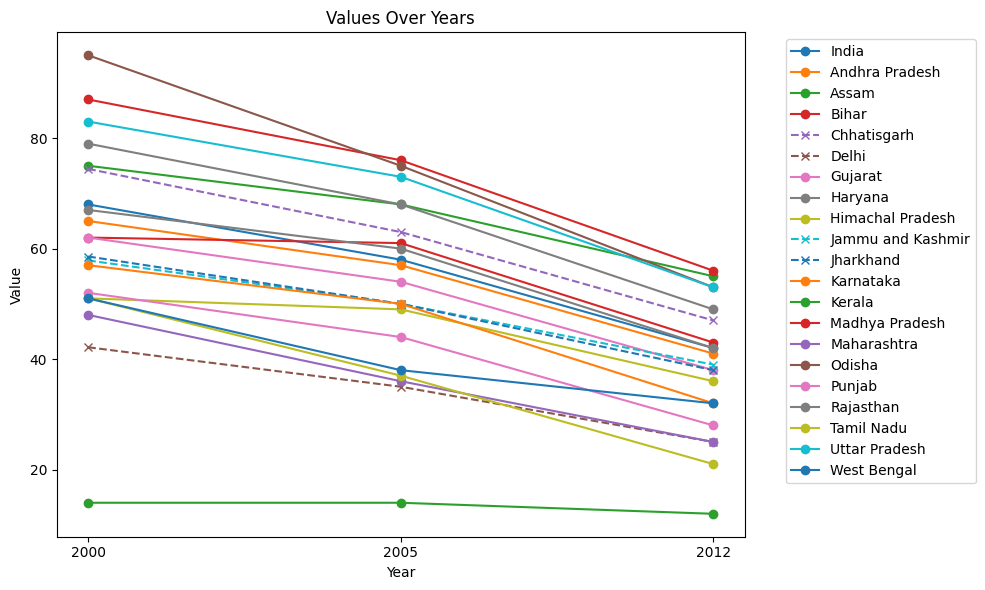

In [ ]:
# vamos a probar una función de interpolación hecha a mano
df_linear2 = df_t2000.copy()
for i, row in df_linear2.iterrows():
    if pd.isna(row['Total-2000']):
        # Calculate the rate of change per year from 2005 to 2012
        rate_of_change = (row['Total-2012'] - row['Total-2005']) / 7  # 7 years difference
        # Estimate the 2000 value by reversing this rate of change
        df_linear2.at[i, 'Total-2000'] = row['Total-2005'] - (5 * rate_of_change)  # 5 years from 2000 to 2005

plot_with_imputation(df_t2000,df_linear2)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


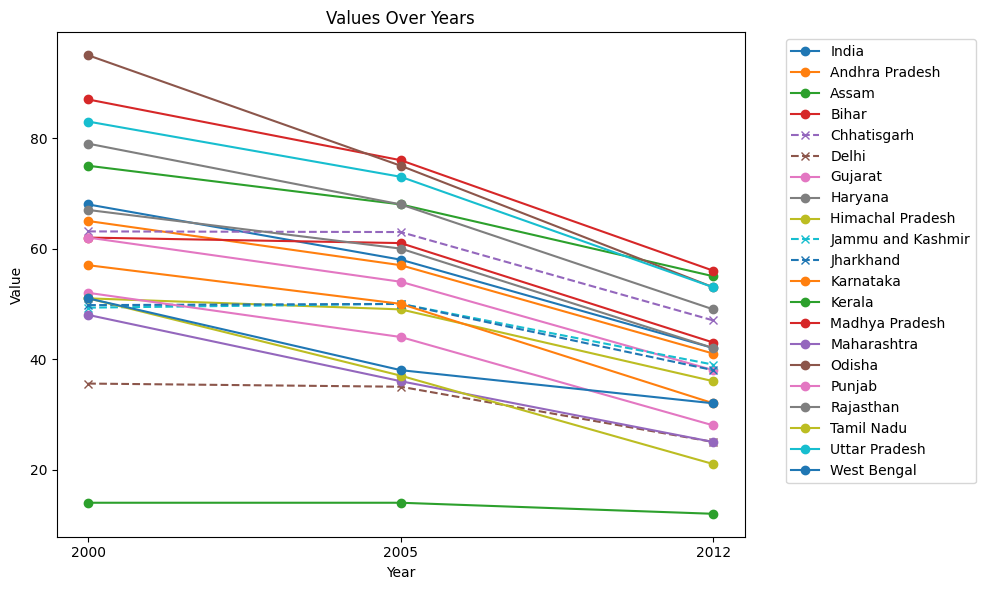

                         Total-2000  Total-2005  Total-2012
India and Bigger States                                    
India                     68.000000        58.0        42.0
Andhra Pradesh            65.000000        57.0        41.0
Assam                     75.000000        68.0        55.0
Bihar                     62.000000        61.0        43.0
Chhatisgarh               63.114286        63.0        47.0
Delhi                     35.571429        35.0        25.0
Gujarat                   62.000000        54.0        38.0
Haryana                   67.000000        60.0        42.0
Himachal Pradesh          51.000000        49.0        36.0
Jammu and Kashmir         49.314286        50.0        39.0
Jharkhand                 49.771429        50.0        38.0
Karnataka                 57.000000        50.0        32.0
Kerala                    14.000000        14.0        12.0
Madhya Pradesh            87.000000        76.0        56.0
Maharashtra               48.000000     

In [ ]:
# Redoing the quadratic fitting process to estimate only the missing 'Total-2000' values
df_poly = df_t2000.copy()
# Define the x values (years) as numeric values for fitting
x_years = np.array([0, 1, 2])  # 0 for 2000, 1 for 2005, and 2 for 2012

for i, row in df_poly.iterrows():
    # We only fit the function if there's a missing value for Total-2000
    if np.isnan(row['Total-2000']):
        # Ignore NaN values for fitting
        mask = ~np.isnan(row)
        # Fit a quadratic polynomial (2nd degree) using the non-NaN values
        coefs = np.polyfit(x_years[mask], row[mask], 2)
        # Create a polynomial function from the coefficients
        poly = np.poly1d(coefs)
        # Use the polynomial function to estimate the missing Total-2000 value
        df_poly.at[i, 'Total-2000'] = poly(0)

plot_with_imputation(df_t2000,df_poly)
print(df_poly)



In [ ]:
# la parte buena de este analisis es que creo que puedo ir más rápido para arreglar el resto de datos
# ahora me doy cuenta de que tengo 0.0 que en realidad son NaN

# voy a dejar los datos imputados en la columna
trends_residence_IMR['Total-2000'] = df_linear2['Total-2000'].values
# tranformo los 0.0 a NaN
trends_residence_IMR.replace(0.0, np.nan, inplace=True)
# echo un ojo a lo que tengo ahora
print(trends_residence_IMR.isnull().sum())
trends_residence_IMR

India and Bigger States                     0
Total-2000                                  0
Total-2005                                  0
Total-2012                                  0
Total-% compound annual change-2000/2005    5
Total-% compound annual change-2005/2012    0
Rural-2000                                  4
Rural-2005                                  0
Rural-2012                                  0
Rural-% compound annual change-2000/2005    4
Rural-% compound annual change-2005/2012    0
Urban-2000                                  4
Urban-2005                                  0
Urban-2012                                  0
Urban-% compound annual change-2000/2005    5
Urban-% compound annual change-2005/2012    0
dtype: int64


,India and Bigger States,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012
0,India,68.000000,58.0,42.0,-3.131223,-4.506355,74.0,64.0,46.0,-2.861890,-4.608183,44.0,40.0,28.0,-1.888150,-4.967720
1,Andhra Pradesh,65.000000,57.0,41.0,-2.592522,-4.597791,74.0,63.0,46.0,-3.167361,-4.393332,36.0,39.0,30.0,1.613736,-3.678691
2,Assam,75.000000,68.0,55.0,-1.940533,-2.985588,78.0,71.0,58.0,-1.863006,-2.847763,35.0,39.0,33.0,2.187862,-2.358236
3,Bihar,62.000000,61.0,43.0,-0.324682,-4.872624,63.0,62.0,44.0,-0.319495,-4.781136,53.0,47.0,34.0,-2.374247,-4.520183
4,Chhatisgarh,74.428571,63.0,47.0,NaN,-4.099146,NaN,65.0,48.0,NaN,-4.238774,NaN,52.0,39.0,NaN,-4.026439
5,Delhi,42.142857,35.0,25.0,NaN,-4.693051,NaN,44.0,36.0,NaN,-2.826024,NaN,33.0,23.0,NaN,-5.026600
6,Gujarat,62.000000,54.0,38.0,-2.725185,-4.896052,69.0,63.0,45.0,-1.802984,-4.693051,45.0,37.0,24.0,-3.839250,-5.996458
7,Haryana,67.000000,60.0,42.0,-2.182786,-4.967720,69.0,64.0,46.0,-1.493208,-4.608183,57.0,45.0,33.0,-4.617757,-4.334059
8,Himachal Pradesh,51.000000,49.0,36.0,-0.796914,-4.308724,52.0,50.0,37.0,-0.781346,-4.210299,35.0,20.0,25.0,-10.588704,3.239118
9,Jammu and Kashmir,57.857143,50.0,39.0,NaN,-3.487194,NaN,53.0,41.0,NaN,-3.600991,NaN,39.0,28.0,NaN,-4.623382


In [ ]:
# con la misma técnica que usé para arreglar total-2000 puedo arreglar rural-2000 y urban-2000 y luego hacer
# los cálculos de los porcentajes que faltan. Con eso tendría el conjunto de datos limpio y estaría
# más o menos contento con la imputación que he hecho. Podría mejorarla un poco usando una corrección
# por el mejor ajuste de los datos no missing y usando esos parámetros en la imputación

# me voy a crear una func para automatizarlo un poco
def imputar_lineal(df_orig, prefijo='Total'):
    df = df_orig.copy()
    df.index = trends_residence_IMR['India and Bigger States']
    for i, row in df.iterrows():
        if pd.isna(row[f"{prefijo}-2000"]):
            # Calculate the rate of change per year from 2005 to 2012
            rate_of_change = (row[f'{prefijo}-2012'] - row[f'{prefijo}-2005']) / 7  # 7 years difference
            # Estimate the 2000 value by reversing this rate of change
            df.at[i, f'{prefijo}-2000'] = row[f'{prefijo}-2005'] - (5 * rate_of_change)  # 5 years from 2000 to 2005
    return df



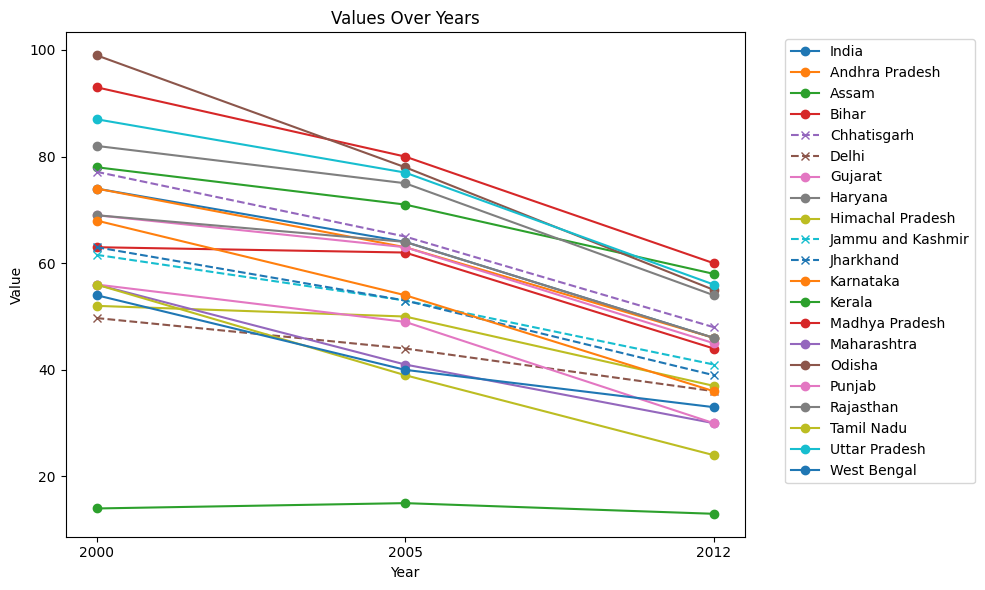

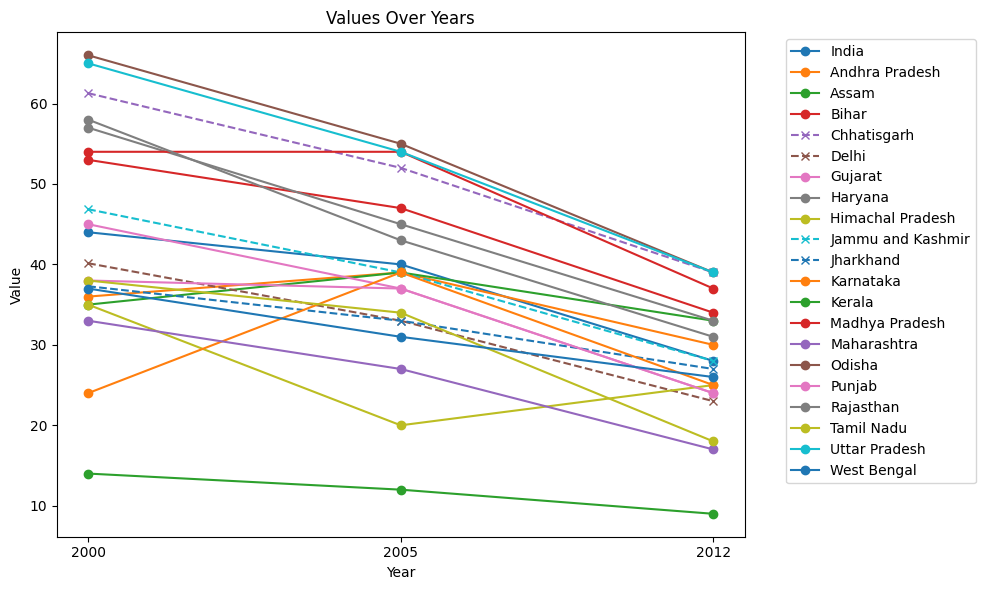

In [ ]:
# calculo
df_rural_linear = imputar_lineal(trends_residence_IMR.iloc[:,6:9], prefijo='Rural')
df_urban_linear = imputar_lineal(trends_residence_IMR.iloc[:,11:14], prefijo='Urban')
# reviso
plot_with_imputation(trends_residence_IMR.iloc[:,6:9],df_rural_linear)
plot_with_imputation(trends_residence_IMR.iloc[:,11:14],df_urban_linear)


In [ ]:
# y si todo está bien, imputo
trends_residence_IMR['Rural-2000'] = df_rural_linear['Rural-2000'].values
trends_residence_IMR['Urban-2000'] = df_urban_linear['Urban-2000'].values
# y vuelvo a mirar
print(trends_residence_IMR.isnull().sum())
trends_residence_IMR

India and Bigger States                     0
Total-2000                                  0
Total-2005                                  0
Total-2012                                  0
Total-% compound annual change-2000/2005    5
Total-% compound annual change-2005/2012    0
Rural-2000                                  0
Rural-2005                                  0
Rural-2012                                  0
Rural-% compound annual change-2000/2005    4
Rural-% compound annual change-2005/2012    0
Urban-2000                                  0
Urban-2005                                  0
Urban-2012                                  0
Urban-% compound annual change-2000/2005    5
Urban-% compound annual change-2005/2012    0
dtype: int64


,India and Bigger States,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012
0,India,68.000000,58.0,42.0,-3.131223,-4.506355,74.000000,64.0,46.0,-2.861890,-4.608183,44.000000,40.0,28.0,-1.888150,-4.967720
1,Andhra Pradesh,65.000000,57.0,41.0,-2.592522,-4.597791,74.000000,63.0,46.0,-3.167361,-4.393332,36.000000,39.0,30.0,1.613736,-3.678691
2,Assam,75.000000,68.0,55.0,-1.940533,-2.985588,78.000000,71.0,58.0,-1.863006,-2.847763,35.000000,39.0,33.0,2.187862,-2.358236
3,Bihar,62.000000,61.0,43.0,-0.324682,-4.872624,63.000000,62.0,44.0,-0.319495,-4.781136,53.000000,47.0,34.0,-2.374247,-4.520183
4,Chhatisgarh,74.428571,63.0,47.0,NaN,-4.099146,77.142857,65.0,48.0,NaN,-4.238774,61.285714,52.0,39.0,NaN,-4.026439
5,Delhi,42.142857,35.0,25.0,NaN,-4.693051,49.714286,44.0,36.0,NaN,-2.826024,40.142857,33.0,23.0,NaN,-5.026600
6,Gujarat,62.000000,54.0,38.0,-2.725185,-4.896052,69.000000,63.0,45.0,-1.802984,-4.693051,45.000000,37.0,24.0,-3.839250,-5.996458
7,Haryana,67.000000,60.0,42.0,-2.182786,-4.967720,69.000000,64.0,46.0,-1.493208,-4.608183,57.000000,45.0,33.0,-4.617757,-4.334059
8,Himachal Pradesh,51.000000,49.0,36.0,-0.796914,-4.308724,52.000000,50.0,37.0,-0.781346,-4.210299,35.000000,20.0,25.0,-10.588704,3.239118
9,Jammu and Kashmir,57.857143,50.0,39.0,NaN,-3.487194,61.571429,53.0,41.0,NaN,-3.600991,46.857143,39.0,28.0,NaN,-4.623382


La fórmula para la Tasa Anual Compuesta de Crecimiento (CAGR, por sus siglas en inglés) es:

$$
\text{CAGR} = \left( \frac{\text{Valor Final}}{\text{Valor Inicial}} \right)^{\frac{1}{\text{Número de Años}}} - 1
$$

Donde:
- "Valor Inicial" es el valor al inicio del período.
- "Valor Final" es el valor al final del período.
- "Número de Años" es la duración del período en años.

Por ejemplo, si el valor inicial en el año 2000 es 68 y el valor final en 2005 es 58, y el número de años entre 2000 y 2005 es 5, el CAGR se puede calcular de la siguiente manera:

$$
\text{CAGR} = \left( \frac{58}{68} \right)^{\frac{1}{5}} - 1
$$

Ahora hagámoslo en python!


In [ ]:
def compound_anual_change(
        ending_value,
        beginning_value,
        number_of_years):
    return 100*((ending_value / beginning_value) ** (1 / number_of_years) - 1)

In [ ]:
# Ejecuto
trends_residence_IMR['Total-% compound annual change-2000/2005'] = compound_anual_change(
        trends_residence_IMR['Total-2005'], trends_residence_IMR['Total-2000'], 5
    )
trends_residence_IMR['Rural-% compound annual change-2000/2005'] = compound_anual_change(
        trends_residence_IMR['Rural-2005'], trends_residence_IMR['Rural-2000'], 5
    )
trends_residence_IMR['Urban-% compound annual change-2000/2005'] = compound_anual_change(
        trends_residence_IMR['Urban-2005'], trends_residence_IMR['Urban-2000'], 5
    )



In [ ]:
# y vuelvo a mirar
print(trends_residence_IMR.isnull().sum())
trends_residence_IMR

# ahora debería guardarlo en bbdd...
# ...Y FIN!!!!!

India and Bigger States                     0
Total-2000                                  0
Total-2005                                  0
Total-2012                                  0
Total-% compound annual change-2000/2005    0
Total-% compound annual change-2005/2012    0
Rural-2000                                  0
Rural-2005                                  0
Rural-2012                                  0
Rural-% compound annual change-2000/2005    0
Rural-% compound annual change-2005/2012    0
Urban-2000                                  0
Urban-2005                                  0
Urban-2012                                  0
Urban-% compound annual change-2000/2005    0
Urban-% compound annual change-2005/2012    0
dtype: int64


,India and Bigger States,Total-2000,Total-2005,Total-2012,Total-% compound annual change-2000/2005,Total-% compound annual change-2005/2012,Rural-2000,Rural-2005,Rural-2012,Rural-% compound annual change-2000/2005,Rural-% compound annual change-2005/2012,Urban-2000,Urban-2005,Urban-2012,Urban-% compound annual change-2000/2005,Urban-% compound annual change-2005/2012
0,India,68.000000,58.0,42.0,-3.131223,-4.506355,74.000000,64.0,46.0,-2.861890,-4.608183,44.000000,40.0,28.0,-1.888150,-4.967720
1,Andhra Pradesh,65.000000,57.0,41.0,-2.592522,-4.597791,74.000000,63.0,46.0,-3.167361,-4.393332,36.000000,39.0,30.0,1.613736,-3.678691
2,Assam,75.000000,68.0,55.0,-1.940533,-2.985588,78.000000,71.0,58.0,-1.863006,-2.847763,35.000000,39.0,33.0,2.187862,-2.358236
3,Bihar,62.000000,61.0,43.0,-0.324682,-4.872624,63.000000,62.0,44.0,-0.319495,-4.781136,53.000000,47.0,34.0,-2.374247,-4.520183
4,Chhatisgarh,74.428571,63.0,47.0,-3.279135,-4.099146,77.142857,65.0,48.0,-3.367431,-4.238774,61.285714,52.0,39.0,-3.232657,-4.026439
5,Delhi,42.142857,35.0,25.0,-3.646207,-4.693051,49.714286,44.0,36.0,-2.412477,-2.826024,40.142857,33.0,23.0,-3.842950,-5.026600
6,Gujarat,62.000000,54.0,38.0,-2.725185,-4.896052,69.000000,63.0,45.0,-1.802984,-4.693051,45.000000,37.0,24.0,-3.839250,-5.996458
7,Haryana,67.000000,60.0,42.0,-2.182786,-4.967720,69.000000,64.0,46.0,-1.493208,-4.608183,57.000000,45.0,33.0,-4.617757,-4.334059
8,Himachal Pradesh,51.000000,49.0,36.0,-0.796914,-4.308724,52.000000,50.0,37.0,-0.781346,-4.210299,35.000000,20.0,25.0,-10.588704,3.239118
9,Jammu and Kashmir,57.857143,50.0,39.0,-2.876885,-3.487194,61.571429,53.0,41.0,-2.953623,-3.600991,46.857143,39.0,28.0,-3.604278,-4.623382
